In [3]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [9]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
        
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : \n\n", higher_miss_value_column) 
        
        return higher_miss_value_column
    else:
        print("There are no Higher Column Missing values in Dataset")
        
missing_val = get_percentage_miss_value(df)





There are no Higher Column Missing values in Dataset


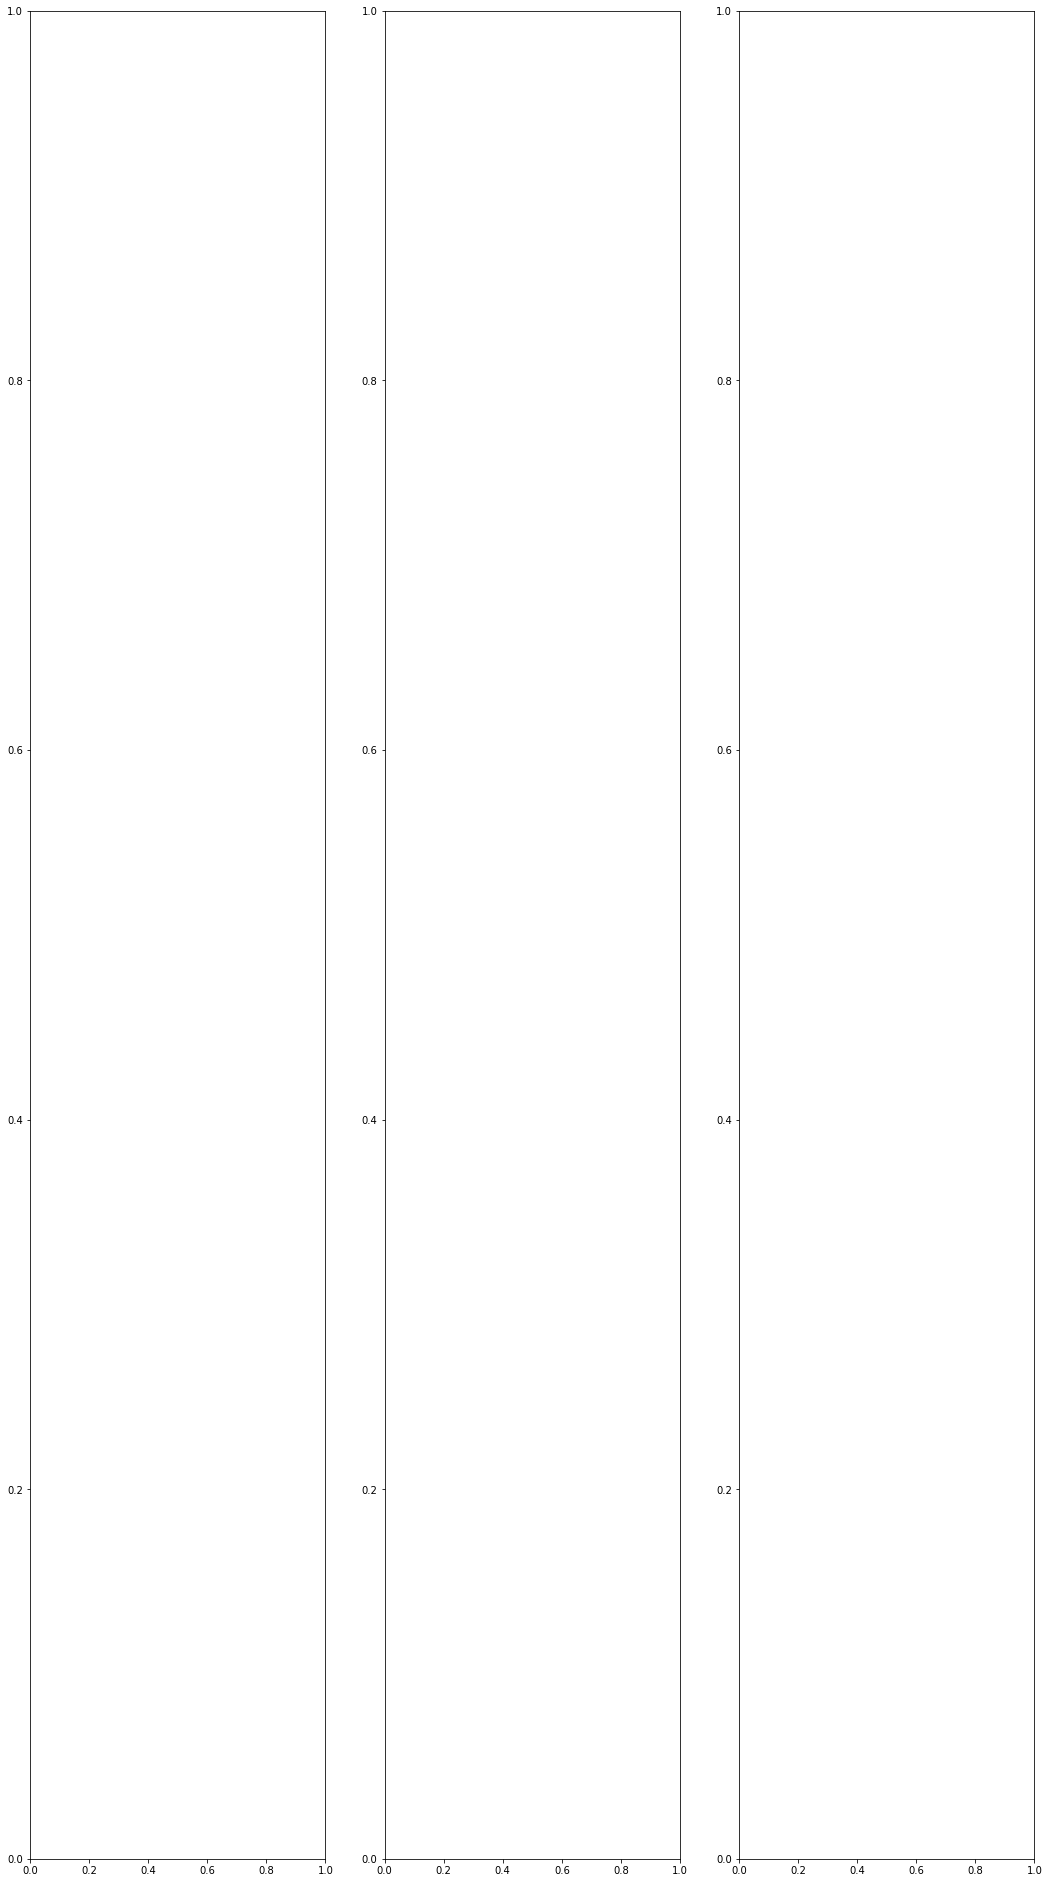

In [10]:
def visualize_categorical_values(dataset):
    no_of_columns = 3
    no_of_rows = 3
    
    columns_object_type = [i for i in dataset.columns  if dataset[i].dtype == "object"]
    total_rows = (len(columns_object_type) // no_of_rows ) + 1
    
    f, axes = plt.subplots(total_rows, no_of_columns, figsize=(18,34))

    for ind, val in enumerate(columns_object_type):
        sns.countplot(df[val] , ax = axes[ind // no_of_rows , ind %no_of_columns ])
    plt.show() 
    
visualize_categorical_values(df)


<Figure size 1296x2448 with 0 Axes>

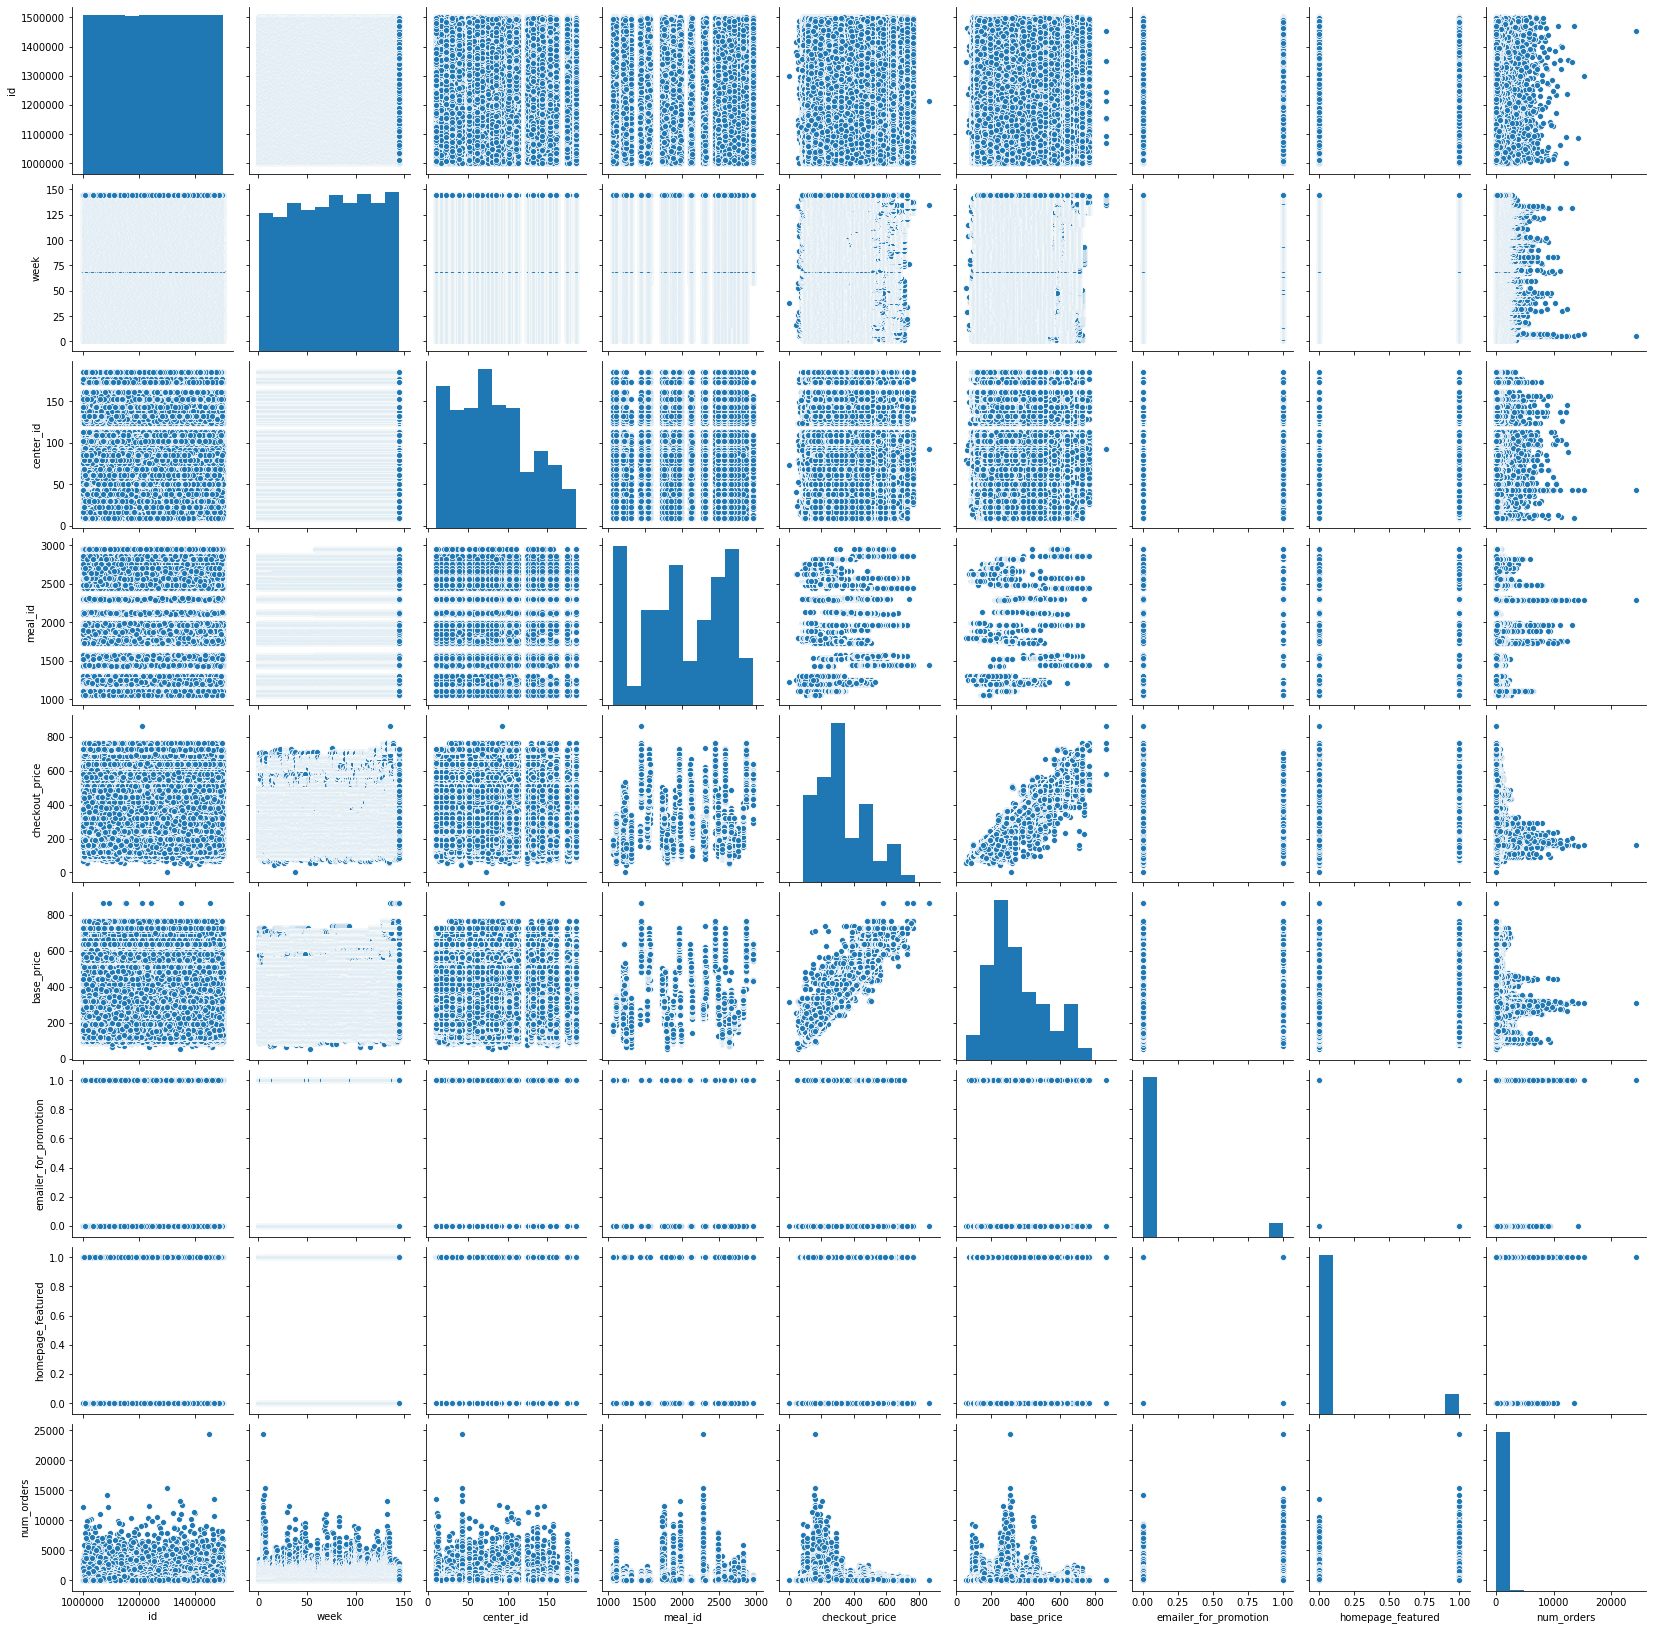

In [11]:
def visualize_numberical_values(dataset):
    plt.figure(figsize=(18,34))
    sns.pairplot(df)
    plt.show()
visualize_numberical_values(df)

In [13]:
def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            
            print("*"*100)
            print("\n")
check_cloumn_details_type_categorical(df)

In [14]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            
            
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
check_cloumn_details_type_numberical(df) 
check_cloumn_details_type_float(df)

Columns name :   id


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



****************************************************************************************************


Columns name :   num_orders
{177: 3584, 270: 2243, 189: 3201, 54: 8845, 40: 10179, 28: 11548, 190: 3347, 391: 1380, 472: 1006, 676: 482, 823: 290, 972: 180, 162: 3718, 420: 1267, 756: 356, 108: 5230, 188: 3216, 485: 977, 798: 304, 14: 12270, 176: 3430, 150: 3928, 312: 1885, 231: 2704, 13: 12397, 15: 12294, 1498: 56, 1243: 84, 55: 8591, 67: 7589, 81: 6683, 377: 1471, 514: 791, 1176: 97, 256: 2333, 243: 2437, 324: 1809, 998: 192, 702: 384, 877: 253, 134: 4307, 285: 2134, 95: 5961, 82: 6599, 42: 10083, 744: 365, 393: 1346, 554: 694, 27: 11462, 148: 4113, 364: 1601, 109: 5107, 96: 5794, 215: 2819, 419: 1268, 634: 553, 122: 4792, 487: 952, 107: 5315, 203: 3039, 959: 198, 1052: 159, 379: 1506, 80: 6722, 620: 563, 1594: 49, 446: 1133, 513: 814, 703: 392, 879: 250, 1984: 32, 202: 3059, 271: 2241, 68: 7650, 258: 2323, 458: 1016, 729: 364, 528: 769, 41: 10344, 783: 347, 769: 355, 459: 955, 540:

In [15]:
def check_skewness_numerical(dataset,target):
    #analysing the distribution of HR Selection
    print('skew is', dataset[target].skew())   
    plt.hist(dataset['target'], color= 'b')

    plt.title('Distribution of HR section YES / NO', fontsize = 24)
    plt.ylabel('observation', fontsize = 20)
    plt.xlabel('selection', fontsize = 20)

    plt.show()
    
check_skewness_numerical(df , "target")

KeyError: 'target'

In [16]:
def drop_outliers(x, columns_name):
    list = []
    for chk in columns_name:
        Q1 = x[chk].quantile(.25)
        Q3 = x[chk].quantile(.75)
        IQR = Q3-Q1
        x =  x[(x[chk] >= (Q1-(1.5*IQR))) & (x[chk] <= (Q3+(1.5*IQR)))] 
    return x  

In [ ]:
def drop_outliers(dataset, columns_name):
    list = []
    for chk in columns_name:
        
#         plt.boxplot(dataset[chk]) # please with graph & it is optional
        
        Q1 = dataset[chk].quantile(.25)
        Q3 = dataset[chk].quantile(.75)
        IQR = Q3-Q1
        dataset =  dataset[(dataset[chk] >= (Q1-(1.5*IQR))) & (dataset[chk] <= (Q3+(1.5*IQR)))] 
    return dataset

In [18]:
def corr_metrix(dataset):
    corr = dataset.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap='RdYlGn')

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
    ax.tick_params(labelsize=20)



def corr_2_more_visualize(dataset):
    corr = dataset.corr()
    
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
    ax.tick_params(labelsize=20)
    plt.show()

In [19]:
def reg_evaluation(y_actual, y_pred, data_type = "Train"):
    print("Model Evaluation Dataset Type is  : ", data_type)
    print("\n")
    
    print("Accuracy  :  ", r2_score(y_actual, y_pred))
    print("MAE       :  ", mean_absolute_error(y_actual, y_pred))
    print("MSLE      :  ", mean_squared_log_error(y_actual, y_pred))
    print("MSE       :  ", mean_squared_error(y_actual, y_pred))
    print("RMSE      :  ", np.sqrt(mean_squared_error(y_actual, y_pred)))
    
def linear_regression_train_test():
    #Linear regression with L2 regularization
    for i in range(-2, 3):
        alpha = 10**i
        rm = Ridge(alpha = alpha)
        ridge_model = rm.fit(X_train, y_train)
        preds_ridge = ridge_model.predict(X_test)
    
        plt.scatter(preds_ridge, y_test, alpha= 0.75, c= 'b')
        plt.xlabel('Predicted price')
        plt.ylabel('Actual price')
        plt.title('Ridge redularization with alpha {}'.format(alpha))
        overlay = 'R square: {} \nRMSE: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
        plt.annotate(s = overlay, xy = (12.1, 10.6), size = 'x-large')
        plt.show()
        
def actual_predict_visualization(actual_values, predict_values):
    plt.scatter(actual_values, predict_values, alpha= 0.75, color = 'b')

    plt.xlabel('Predicted price')
    plt.ylabel('Actual price')
    plt.title('Regression Model')
    plt.show()

In [ ]:
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)
    

    
    
def mean_absolute_percentage_error(y_true, y_pred) :
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(np.abs( (y_true - y_pred) / 100) ) * 100


def root_mean_sequare_error(y_true, y_pred) : 
    mse = mean_squared_error(y_true,  y_pred)  
    return np.sqrt(mse)
   

rows=[]

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.30 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = r2_score(y_train, y_pred_train)
            train_acc = round(train_acc, 2) * 100
            
            test_acc = r2_score(y_test, y_pred)
            test_acc = round(test_acc, 2) * 100
            
            mape = mean_absolute_percentage_error(y_test, y_pred)
            mape = round(mape, 2)
            
            mae = mean_absolute_error(y_test, y_pred)   
            mae = round(mae, 2)
            
            mse = mean_squared_error(y_test, y_pred)
            mse = round(mse, 2)
            
            rmse = root_mean_sequare_error(y_test, y_pred)
            rmse = round(rmse, 2)

            row = [names[j],   i,   train_acc, test_acc,  mae,    mse]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    
names_regression = [ "Lasso", "Ridge"]
algorithms = [ Lasso(), Ridge(alpha=ridge_alpha)]

columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc",   "MAE",   "MSE"]

random_state_list_up_to_10 = [0,1,2,3,4,5,6,7,8,9,10]


addRandomStateForAlgorithm(X,y,names_regression,algorithms,columns_name,random_state_list_up_to_10)

In [21]:

from sklearn.base import TransformerMixin, BaseEstimator
from collections import Counter , defaultdict

import pandas as pd
from pandas import Series as s , DataFrame as df
import numpy as np

import seaborn as sns
# import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt, rcParams as rc


%matplotlib inline
rc["figure.figsize"] = 10,6

import datetime
import datetime as dt


In [1]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, normalize


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


from xgboost import XGBRegressor , XGBRFRegressor

import lightgbm


from catboost import CatBoostRegressor

from sklearn.pipeline import Pipeline

# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
from collections import Counter , defaultdict

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.base import TransformerMixin, BaseEstimator

from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTETomek # over sampling method 1



## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler # over sampling method 2



from imblearn.under_sampling import NearMiss


#preprocessing
from sklearn.preprocessing import LabelEncoder



import lightgbm as lgb

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [8]:
df = pd.read_csv("train.csv")

df_test = pd.read_csv("test_QoiMO9B.csv")
submission = pd.read_csv("sample_submission_hSlSoT6.csv")

df10 = df.copy()
df.shape, df_test.shape , submission.shape

((456548, 9), (32573, 8), (32573, 2))

In [ ]:
submission_1 = submission.copy()

print(df_test.shape , submission.shape , len(y_pred_final))

submission_1["target"] = y_pred_final

print(submission_1["target"].values)

submission_1.to_csv('submission_7.csv', index=False)

df_submission_1 = pd.read_csv('submission_7.csv')
print(df_submission_1.shape)

df_submission_1.head(3)